Perceptron - modelo linear para classificação binária


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
X_iris, y_iris = load_iris(return_X_y=True, as_frame=True)

In [4]:
# Visualizacao 3 primeiros
X_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
# Selecao das duas colunas de petala e targets (valor que queremos prever) igual a 0 e 1
X = X_iris.loc[y_iris.isin([0,1]),['petal length (cm)','petal width (cm)']]
y = y_iris.loc[y_iris.isin([0,1])]

In [8]:
y.value_counts()

target
0    50
1    50
Name: count, dtype: int64

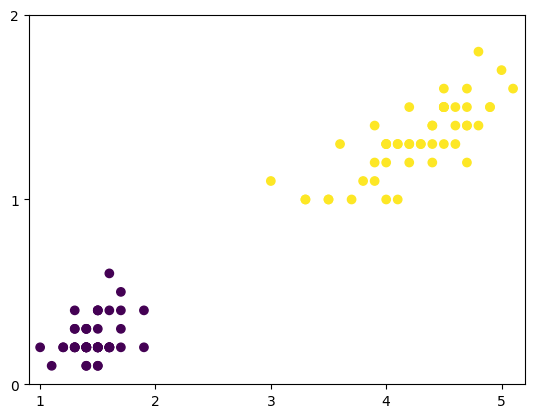

In [9]:
fig,ax = plt.subplots()

ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y)

ax.set(xlim=(0.9, 5.2), xticks=[1,2,3,4,5],
       ylim=(0,2), yticks=[0,1,2])

plt.show()

Classe linearmente separaveis, uma linha separa as duas classes no grafico

eixo x - petal_length
eixo y = petal_width